<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aim" data-toc-modified-id="Aim-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aim</a></span></li><li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load libraries</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span><ul class="toc-item"><li><span><a href="#Load-the-metabolomics-data" data-toc-modified-id="Load-the-metabolomics-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load the metabolomics data</a></span></li><li><span><a href="#Load-metabolatis-enzyme-interactions-from-KEGG" data-toc-modified-id="Load-metabolatis-enzyme-interactions-from-KEGG-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Load metabolatis enzyme interactions from KEGG</a></span></li><li><span><a href="#Load-PPI" data-toc-modified-id="Load-PPI-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Load PPI</a></span></li></ul></li><li><span><a href="#Meap" data-toc-modified-id="Meap-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Meap</a></span><ul class="toc-item"><li><span><a href="#Create-Cytoscape-file" data-toc-modified-id="Create-Cytoscape-file-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create Cytoscape file</a></span></li></ul></li></ul></div>

# Aim

In [ ]:
Here, we present a new algorithm MeaP (Metabolite enzyme association Predictor), which predicts the potential
associations between metabolites and enzymes in metabolomics data.
MeaP uses the enzyme-metabolite interaction data from Kyoto Encyclopedia of Genes and Genomes (KEGG) reaction database 
and the protein-protein interaction data from STRING database.
We applied MeaP to our metabolomics profiling study in a cohort of ALS. 

# Meap used the algorithm implemented in PandaR R package
#https://www.bioconductor.org/packages/release/bioc/html/pandaR.html

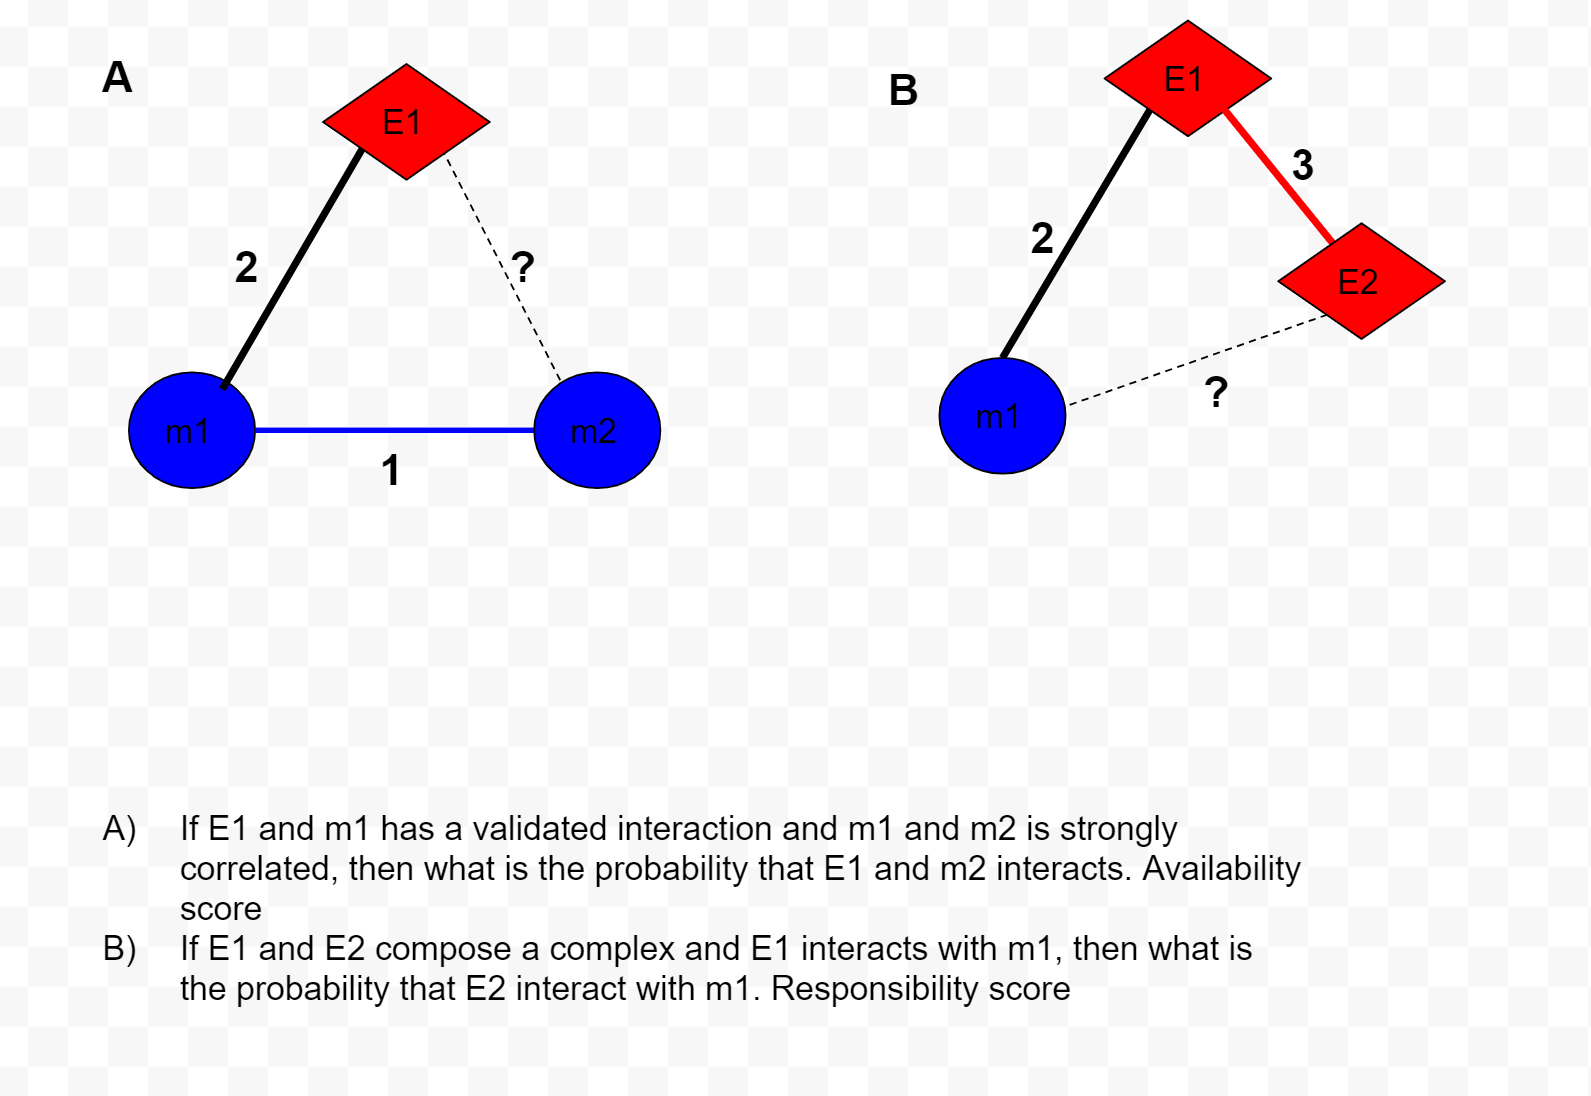

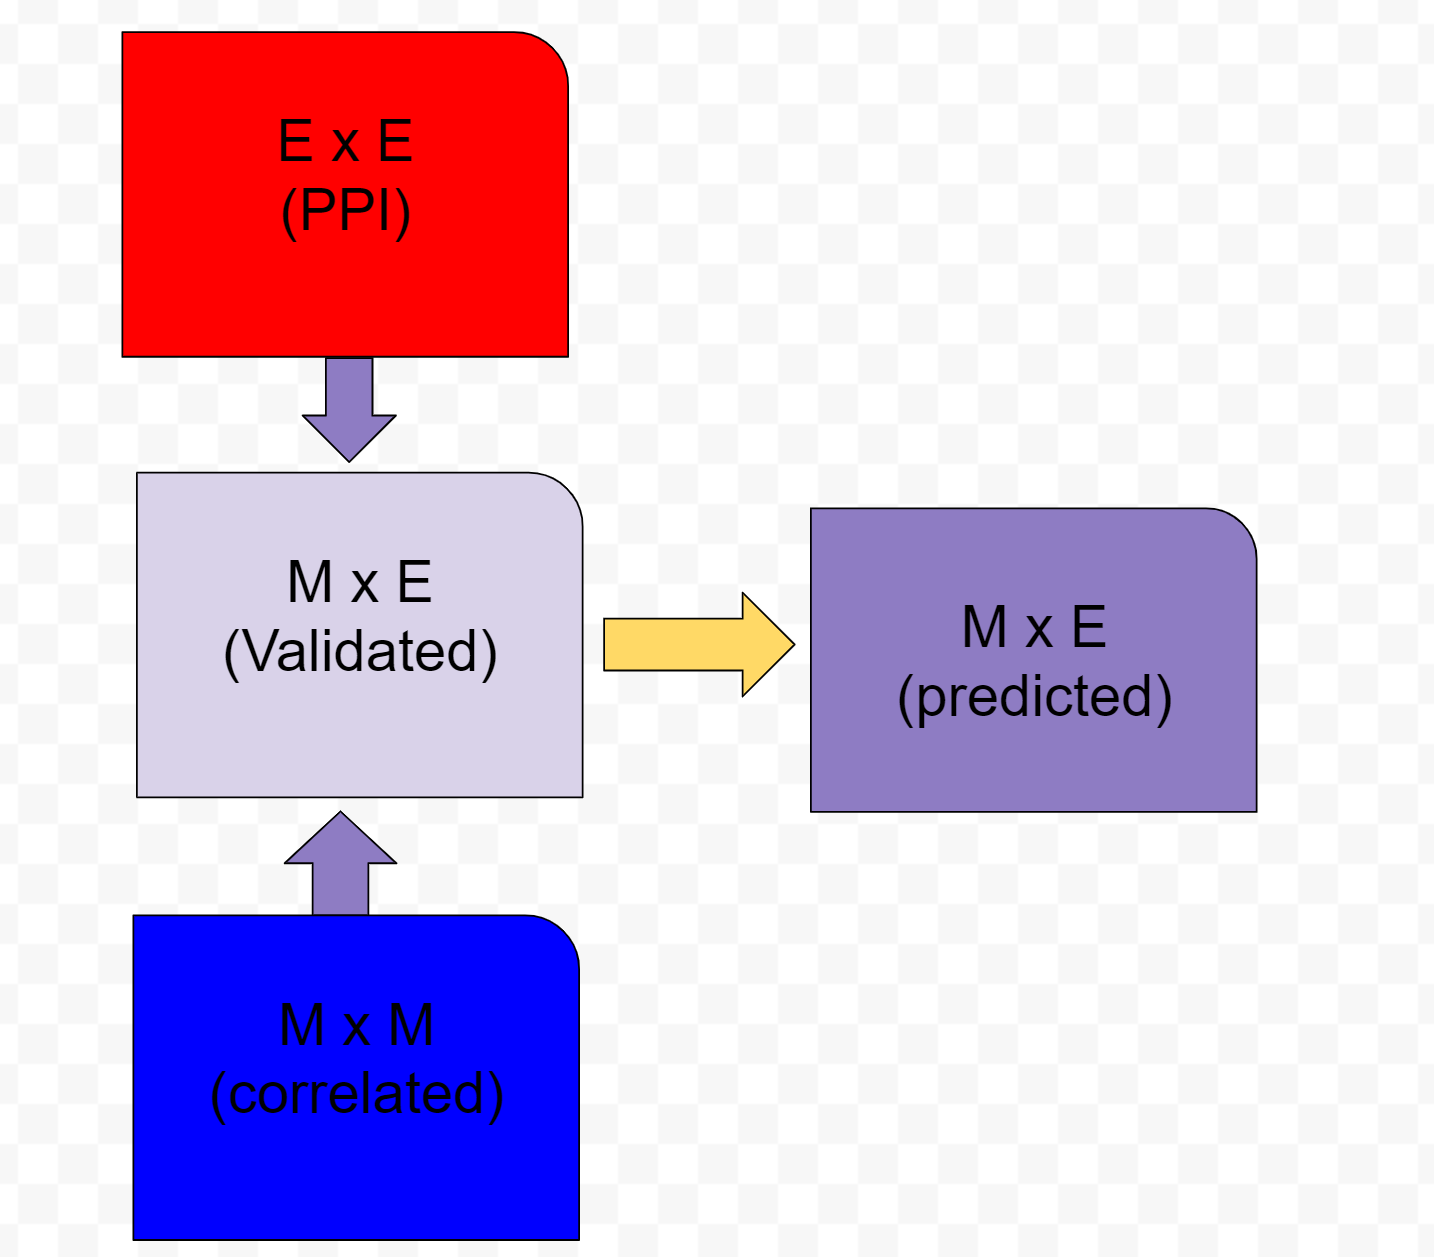

In [170]:
rm(list=ls())
ls()

character(0)

# Load libraries

In [171]:
library(corrplot)
library("Hmisc")
#install.packages("tidyverse")
library(tidyverse)
library(tidyr)
library(tibble)
library(corrplot)
library(Hmisc)
library(caret)
library(reshape2)
library(dtw)
library("readxl")
library(glmnet)
library("ggpubr")
#install.packages("mice")
library(mice)
library(doParallel)
library(circlize)
library(reshape2)
#BiocManager::install("ComplexHeatmap")
library(ComplexHeatmap)
#install.packages("qdapRegex")
#library(qdapRegex)
library(data.table)

In [172]:
ls()

character(0)

In [2]:
load("MeaP.RData")

In [198]:
save.image("MeaP.RData")

# Load the data

## Load the metabolomics data

In [173]:
#Load metabolomics annotation
metabolomics_meta=read.csv("metabolomics_meta_updated.csv",check.names=F)
metabolomics_meta$KEGG=as.character(metabolomics_meta$KEGG)
#Load metabolomics expression data
expression=read.csv('metabolomics_data_ALS.csv',row.names=1,check.names=F)
head(expression)

#Load samples information
samples_meta=read.csv("samples_meta_ALS.csv")
samples_meta$epi_study_id=as.character(samples_meta$epi_study_id)

,(12 or 13)-methylmyristate (a15:0 or i15:0),(14 or 15)-methylpalmitate (a17:0 or i17:0),(16 or 17)-methylstearate (a19:0 or i19:0),(2 or 3)-decenoate (10:1n7 or n8),"(2,4 or 2,5)-dimethylphenol sulfate",(2-butoxyethoxy)acetic acid,(N(1) + N(8))-acetylspermidine,(R)-3-hydroxybutyrylcarnitine,(S)-3-hydroxybutyrylcarnitine,"1,2,3-benzenetriol sulfate (2)",...,vanillylmandelate (VMA),venlafaxine,verapamil,warfarin,xanthine,xanthosine,xanthurenate,ximenoylcarnitine (C26:1)*,xylose,zolpidem
1,0.3736,0.4850,0.5846,0.1705,47.5763,0.9099,1.2741,0.9626,1.6924,0.6530,...,0.7035,0.0015,1,9e-04,0.5582,0.487,1.0817,0.7630,10.0263,0.025
6,0.2066,1.2845,1.3130,2.4781,1.0000,0.3255,1.4276,2.5287,3.2851,1.6046,...,1.0520,0.0015,1,9e-04,1.1599,0.487,0.9236,0.5607,0.9755,0.025
11,0.2066,0.5625,0.6118,1.0179,0.6396,1.7665,0.8241,0.8354,0.9673,0.3715,...,0.5675,0.0015,1,9e-04,1.3741,0.487,1.1281,1.2601,1.4559,0.025
12,0.5480,0.6477,0.5941,0.8621,0.1750,1.2617,1.7546,0.9271,1.4425,0.1473,...,1.6239,0.0015,1,9e-04,1.3302,0.487,0.8965,1.1247,3.5070,0.025
16,2.9221,4.0079,2.2858,2.9174,0.1750,0.8774,0.7941,2.0689,1.0742,0.0369,...,1.1936,0.0015,1,9e-04,1.2517,0.487,0.6008,1.0183,0.4881,0.025
30,0.2066,0.8570,0.6897,0.7595,0.1750,1.1039,0.7397,0.8335,0.7480,0.8797,...,0.6543,0.0015,1,9e-04,0.9424,0.487,0.8181,1.1431,0.4674,0.025


In [174]:
new_colnames=str_replace_all(metabolomics_meta[match(colnames(expression),metabolomics_meta$BIOCHEMICAL),'KEGG'],
                "^$",
                as.character(metabolomics_meta[match(colnames(expression),metabolomics_meta$BIOCHEMICAL),'BIOCHEMICAL']))
head(new_colnames,15)

[1] "(12 or 13)-methylmyristate (a15:0 or i15:0)"
 [2] "(14 or 15)-methylpalmitate (a17:0 or i17:0)"
 [3] "(16 or 17)-methylstearate (a19:0 or i19:0)" 
 [4] "(2 or 3)-decenoate (10:1n7 or n8)"          
 [5] "(2,4 or 2,5)-dimethylphenol sulfate"        
 [6] "(2-butoxyethoxy)acetic acid"                
 [7] "(N(1) + N(8))-acetylspermidine"             
 [8] "(R)-3-hydroxybutyrylcarnitine"              
 [9] "(S)-3-hydroxybutyrylcarnitine"              
[10] "1,2,3-benzenetriol sulfate (2)"             
[11] "1,2-dilinoleoyl-GPC (18:2/18:2)"            
[12] "1,2-dilinoleoyl-GPE (18:2/18:2)*"           
[13] "1,2-dipalmitoyl-GPC (16:0/16:0)"            
[14] "1,2-distearoyl-GPC (18:0/18:0)"             
[15] "C16361"

In [175]:
# Divide data into ALS and CTRL

expression_new_ALS=expression
expression_new_ALS=expression_new_ALS %>% rownames_to_column('epi_study_id') %>% 
inner_join(.,samples_meta[,c('ALS','epi_study_id')],by='epi_study_id') %>%
filter(ALS=='ALS') %>% select(-ALS) %>% column_to_rownames('epi_study_id')
colnames(expression_new_ALS)=new_colnames
expression_new_ALS=t(expression_new_ALS)
dim(expression_new_ALS)
head(expression_new_ALS,15)


expression_new_ctrl=expression
expression_new_ctrl=expression_new_ctrl %>% rownames_to_column('epi_study_id') %>% 
inner_join(.,samples_meta[,c('ALS','epi_study_id')],by='epi_study_id') %>%
filter(ALS=='Ctrl') %>% select(-ALS) %>% column_to_rownames('epi_study_id')
colnames(expression_new_ctrl)=new_colnames
expression_new_ctrl=t(expression_new_ctrl)
dim(expression_new_ctrl)
head(expression_new_ctrl,15)

[1] 1051  134

,6,11,12,16,30,31,38,45,48,67,...,1079,1094,1095,1099,1114,1115,1123,1131,1188,1194
(12 or 13)-methylmyristate (a15:0 or i15:0),0.2066,0.2066,0.5480,2.9221,0.2066,2.5478,4.6602,0.2066,0.2066,2.8331,...,0.2066,0.2066,1.2327,0.2066,0.2066,0.2066,2.7894,0.2066,0.2066,0.7243
(14 or 15)-methylpalmitate (a17:0 or i17:0),1.2845,0.5625,0.6477,4.0079,0.8570,3.0461,3.9844,1.6719,2.1584,2.8543,...,0.7637,1.0041,1.3589,0.7103,0.8589,2.3921,4.0110,3.1109,0.7176,1.1187
(16 or 17)-methylstearate (a19:0 or i19:0),1.3130,0.6118,0.5941,2.2858,0.6897,2.0077,1.8414,2.2232,1.8546,1.5626,...,0.8399,1.1708,1.2333,0.6678,0.8125,2.1244,2.6101,1.8720,1.1322,1.0967
(2 or 3)-decenoate (10:1n7 or n8),2.4781,1.0179,0.8621,2.9174,0.7595,2.7733,1.1418,0.6739,0.6646,3.2047,...,0.4201,0.3351,0.9156,0.6731,0.6169,4.9562,3.0416,3.2242,2.0891,0.4460
"(2,4 or 2,5)-dimethylphenol sulfate",1.0000,0.6396,0.1750,0.1750,0.1750,0.1750,0.1750,0.1750,0.1750,0.4991,...,0.1750,1.1087,0.2710,0.4407,0.1750,0.1750,0.1750,0.1750,0.1750,71.8081
(2-butoxyethoxy)acetic acid,0.3255,1.7665,1.2617,0.8774,1.1039,1.8381,2.6324,0.3255,0.7660,0.4868,...,1.9484,0.5510,0.3255,0.3255,0.6597,0.9762,1.0294,2.1155,1.1794,0.3255
(N(1) + N(8))-acetylspermidine,1.4276,0.8241,1.7546,0.7941,0.7397,1.0507,0.8548,0.9992,1.2327,1.4173,...,1.2371,0.9766,1.8726,2.5102,1.4095,0.9769,0.8435,0.8394,1.8234,0.9061
(R)-3-hydroxybutyrylcarnitine,2.5287,0.8354,0.9271,2.0689,0.8335,1.0403,0.6480,0.5037,0.8625,1.0181,...,3.9800,1.9650,1.6162,1.2827,0.8164,1.7516,1.5739,2.0104,2.0697,0.7271
(S)-3-hydroxybutyrylcarnitine,3.2851,0.9673,1.4425,1.0742,0.7480,1.5689,0.8270,0.6324,0.7816,1.0833,...,1.6234,1.6314,1.7471,3.6737,0.7483,2.2867,1.4648,1.5449,1.4539,1.0298
"1,2,3-benzenetriol sulfate (2)",1.6046,0.3715,0.1473,0.0369,0.8797,0.5176,0.7670,0.0305,1.4198,11.8063,...,1.5169,2.2284,1.1479,0.8036,0.0609,1.1165,0.3532,0.4494,0.0109,0.2146


[1] 1051   72

,1,35,73,75,102,112,175,207,221,222,...,1016,1018,1035,1040,1049,1054,1132,1133,1146,1192
(12 or 13)-methylmyristate (a15:0 or i15:0),0.3736,0.2066,0.9786,0.2066,1.5249,0.9694,0.9248,1.1361,0.7862,0.2066,...,0.8655,0.4372,0.2066,1.4901,2.3311,0.9295,1.6423,3.0773,0.2066,1.1309
(14 or 15)-methylpalmitate (a17:0 or i17:0),0.4850,1.6266,0.8774,1.1561,2.2637,1.1148,1.0139,1.1562,0.7334,0.9104,...,0.6895,0.3800,0.7175,1.8077,1.4635,0.8933,1.9605,2.5070,1.2966,1.5157
(16 or 17)-methylstearate (a19:0 or i19:0),0.5846,1.8092,1.0410,1.2683,1.9352,0.9272,0.8248,1.4238,0.6345,1.1238,...,0.6198,0.4300,0.8618,1.3495,1.0137,1.0017,1.2699,2.2754,0.9983,2.1461
(2 or 3)-decenoate (10:1n7 or n8),0.1705,0.8413,0.6287,1.2778,1.9575,0.8865,0.7819,0.8984,0.9682,1.4803,...,1.5860,0.5843,0.8097,2.4175,1.5466,1.0000,1.4788,0.8281,0.6094,0.1705
"(2,4 or 2,5)-dimethylphenol sulfate",47.5763,2.9735,0.9225,0.6243,0.2223,24.6202,1.0102,0.1750,0.9540,2.0947,...,1.2964,0.1911,0.1750,0.1750,0.1750,15.6116,8.8329,13.2046,1.0552,0.1750
(2-butoxyethoxy)acetic acid,0.9099,2.0044,1.2678,0.8487,0.3255,0.6673,0.3505,1.6699,1.0522,0.3255,...,1.3797,0.3255,0.3255,0.9452,0.7929,0.3255,4.0684,0.3255,0.3255,1.0131
(N(1) + N(8))-acetylspermidine,1.2741,0.8728,0.9092,0.8863,0.7834,0.4596,0.8480,1.1714,1.4644,0.8722,...,0.8032,1.5067,0.7882,0.7358,0.6518,1.0237,0.8698,0.7583,0.6709,0.9542
(R)-3-hydroxybutyrylcarnitine,0.9626,2.2814,0.6438,1.6786,0.9423,0.5971,1.8298,0.8807,0.7938,2.2934,...,0.7331,0.4128,0.8784,0.8652,1.8010,0.3224,0.6243,2.4456,0.6364,1.3578
(S)-3-hydroxybutyrylcarnitine,1.6924,2.9874,0.7055,1.7558,0.7688,0.6740,0.9914,0.8695,1.1161,1.3280,...,0.9481,0.3958,0.7799,0.8841,1.2772,0.3611,0.7659,1.2633,1.2221,0.9184
"1,2,3-benzenetriol sulfate (2)",0.6530,2.6970,1.6194,3.3805,1.9864,4.9699,1.6877,1.7536,2.3387,0.3323,...,6.2961,0.2705,0.7388,0.5926,1.3196,8.7509,4.0063,0.6201,3.8584,0.2290


## Load metabolatis enzyme interactions from KEGG

In [176]:
metascape=read.csv("../Metascape files/MetaEnzyme.csv")
head(metascape)
dim(metascape)

ID,compound_id,reaction_id,enzyme_id,direction,Entrez_id
1,C00001,R00010,3.2.1.28,in,11181
2,C00001,R00084,2.5.1.61,in,3145
3,C00001,R00086,3.6.1.3,in,954
4,C00001,R00086,3.6.1.3,in,79659
5,C00001,R00086,3.6.1.5,in,953
6,C00001,R00086,3.6.1.5,in,956


[1] 57967     6

In [177]:
# Convert Entrez_id into Gene name using gProfileR website
#https://biit.cs.ut.ee/gprofiler/gost
id_converted=read.csv("../PPI/NETWORKANALYZER/gProfiler_id_conversion.csv")
head(id_converted)

initial_alias,converted_alias,name,description,namespace
11181,TREH,TREH,trehalase [Source:HGNC Symbol;Acc:HGNC:12266],ENTREZGENE_ACC
3145,HMBS,HMBS,hydroxymethylbilane synthase [Source:HGNC Symbol;Acc:HGNC:4982],ENTREZGENE_ACC
954,ENTPD2,ENTPD2,ectonucleoside triphosphate diphosphohydrolase 2 [Source:HGNC Symbol;Acc:HGNC:3364],ENTREZGENE_ACC
79659,DYNC2H1,DYNC2H1,dynein cytoplasmic 2 heavy chain 1 [Source:HGNC Symbol;Acc:HGNC:2962],ENTREZGENE_ACC
953,ENTPD1,ENTPD1,ectonucleoside triphosphate diphosphohydrolase 1 [Source:HGNC Symbol;Acc:HGNC:3363],ENTREZGENE_ACC
956,ENTPD3,ENTPD3,ectonucleoside triphosphate diphosphohydrolase 3 [Source:HGNC Symbol;Acc:HGNC:3365],ENTREZGENE_ACC


In [178]:
metascape1=metascape %>% rename('initial_alias'='Entrez_id') %>%
inner_join(.,id_converted[c('initial_alias','converted_alias')],by='initial_alias')
head(metascape1)

ID,compound_id,reaction_id,enzyme_id,direction,initial_alias,converted_alias
1,C00001,R00010,3.2.1.28,in,11181,TREH
1,C00001,R00010,3.2.1.28,in,11181,TREH
1,C00001,R00010,3.2.1.28,in,11181,TREH
2,C00001,R00084,2.5.1.61,in,3145,HMBS
2,C00001,R00084,2.5.1.61,in,3145,HMBS
2,C00001,R00084,2.5.1.61,in,3145,HMBS


In [179]:
motif=metascape1[,c('converted_alias','compound_id')]
motif$v3=1
motif=motif[!duplicated(motif), ]
rownames(motif)=NULL
head(motif)

dim(motif)

converted_alias,compound_id,v3
TREH,C00001,1
HMBS,C00001,1
ENTPD2,C00001,1
DYNC2H1,C00001,1
ENTPD1,C00001,1
ENTPD3,C00001,1


[1] 25447     3

In [180]:
motif$converted_alias=as.character(motif$converted_alias)
motif$compound_id=as.character(motif$compound_id)
motif$v3=as.integer(motif$v3)

str(motif)

'data.frame':	25447 obs. of  3 variables:
 $ converted_alias: chr  "TREH" "HMBS" "ENTPD2" "DYNC2H1" ...
 $ compound_id    : chr  "C00001" "C00001" "C00001" "C00001" ...
 $ v3             : int  1 1 1 1 1 1 1 1 1 1 ...


## Load PPI 

In [181]:
ppi_cyto=read.csv("../PPI/NETWORKANALYZER/PPI_Cyto.csv",colClasses = 'character')
head(ppi_cyto)
length(unique(ppi_cyto$SOURCE))
length(unique(ppi_cyto$TARGET))

SOURCE,TARGET
FKBP4,AGO2
FKBP4,HSPA8
FKBP4,PTGES3
FKBP4,PHYH
FKBP4,UBB
FKBP4,ATOX1


[1] 2836

[1] 2809

In [182]:
ppi=ppi_cyto[,c('SOURCE','TARGET')]
ppi$v3=1
head(ppi)

SOURCE,TARGET,v3
FKBP4,AGO2,1
FKBP4,HSPA8,1
FKBP4,PTGES3,1
FKBP4,PHYH,1
FKBP4,UBB,1
FKBP4,ATOX1,1


In [183]:
ppi$v3=as.integer(ppi$v3)
str(ppi)

'data.frame':	13455 obs. of  3 variables:
 $ SOURCE: chr  "FKBP4" "FKBP4" "FKBP4" "FKBP4" ...
 $ TARGET: chr  "AGO2" "HSPA8" "PTGES3" "PHYH" ...
 $ v3    : int  1 1 1 1 1 1 1 1 1 1 ...


In [184]:
# Preview for all three matrix
head(motif)
head(ppi)
head(expression_new_ALS)


converted_alias,compound_id,v3
TREH,C00001,1
HMBS,C00001,1
ENTPD2,C00001,1
DYNC2H1,C00001,1
ENTPD1,C00001,1
ENTPD3,C00001,1


SOURCE,TARGET,v3
FKBP4,AGO2,1
FKBP4,HSPA8,1
FKBP4,PTGES3,1
FKBP4,PHYH,1
FKBP4,UBB,1
FKBP4,ATOX1,1


,6,11,12,16,30,31,38,45,48,67,...,1079,1094,1095,1099,1114,1115,1123,1131,1188,1194
(12 or 13)-methylmyristate (a15:0 or i15:0),0.2066,0.2066,0.5480,2.9221,0.2066,2.5478,4.6602,0.2066,0.2066,2.8331,...,0.2066,0.2066,1.2327,0.2066,0.2066,0.2066,2.7894,0.2066,0.2066,0.7243
(14 or 15)-methylpalmitate (a17:0 or i17:0),1.2845,0.5625,0.6477,4.0079,0.8570,3.0461,3.9844,1.6719,2.1584,2.8543,...,0.7637,1.0041,1.3589,0.7103,0.8589,2.3921,4.0110,3.1109,0.7176,1.1187
(16 or 17)-methylstearate (a19:0 or i19:0),1.3130,0.6118,0.5941,2.2858,0.6897,2.0077,1.8414,2.2232,1.8546,1.5626,...,0.8399,1.1708,1.2333,0.6678,0.8125,2.1244,2.6101,1.8720,1.1322,1.0967
(2 or 3)-decenoate (10:1n7 or n8),2.4781,1.0179,0.8621,2.9174,0.7595,2.7733,1.1418,0.6739,0.6646,3.2047,...,0.4201,0.3351,0.9156,0.6731,0.6169,4.9562,3.0416,3.2242,2.0891,0.4460
"(2,4 or 2,5)-dimethylphenol sulfate",1.0000,0.6396,0.1750,0.1750,0.1750,0.1750,0.1750,0.1750,0.1750,0.4991,...,0.1750,1.1087,0.2710,0.4407,0.1750,0.1750,0.1750,0.1750,0.1750,71.8081
(2-butoxyethoxy)acetic acid,0.3255,1.7665,1.2617,0.8774,1.1039,1.8381,2.6324,0.3255,0.7660,0.4868,...,1.9484,0.5510,0.3255,0.3255,0.6597,0.9762,1.0294,2.1155,1.1794,0.3255


# Meap

In [ ]:
# Meap used the algorthim implemented in PandaR package 
Glass K, Huttenhower C, Quackenbush J, Yuan G (2013). “Passing Messages between Biological Networks to 
Refine Predicted Interactions.” PLoS One, 8(X), e64832.
ISSN 5, doi: 10.1371/journal.pone.0064832.

In [28]:
#BiocManager::install("pandaR")
library(pandaR)

# Mat be you will need to install the following R packages 
#library(genefilter)
#library(GMCM)
#library(matrixStats)

In [29]:
#To know more about panda function
?panda

In [30]:
# data(pandaToyData)
# pandaResult <- panda(pandaToyData$motif, pandaToyData$expression, pandaToyData$ppi)
# pandaResult

In [135]:
#BiocManager::install("genefilter")
#install.packages("GMCM")
#install.packages('matrixStats')

In [185]:
dim(expression_new_ALS)
expression_new_ALS=expression_new_ALS[!duplicated(rownames(expression_new_ALS)),]
dim(expression_new_ALS)
head(expression_new_ALS)

[1] 1051  134

[1] 1044  134

,6,11,12,16,30,31,38,45,48,67,...,1079,1094,1095,1099,1114,1115,1123,1131,1188,1194
(12 or 13)-methylmyristate (a15:0 or i15:0),0.2066,0.2066,0.5480,2.9221,0.2066,2.5478,4.6602,0.2066,0.2066,2.8331,...,0.2066,0.2066,1.2327,0.2066,0.2066,0.2066,2.7894,0.2066,0.2066,0.7243
(14 or 15)-methylpalmitate (a17:0 or i17:0),1.2845,0.5625,0.6477,4.0079,0.8570,3.0461,3.9844,1.6719,2.1584,2.8543,...,0.7637,1.0041,1.3589,0.7103,0.8589,2.3921,4.0110,3.1109,0.7176,1.1187
(16 or 17)-methylstearate (a19:0 or i19:0),1.3130,0.6118,0.5941,2.2858,0.6897,2.0077,1.8414,2.2232,1.8546,1.5626,...,0.8399,1.1708,1.2333,0.6678,0.8125,2.1244,2.6101,1.8720,1.1322,1.0967
(2 or 3)-decenoate (10:1n7 or n8),2.4781,1.0179,0.8621,2.9174,0.7595,2.7733,1.1418,0.6739,0.6646,3.2047,...,0.4201,0.3351,0.9156,0.6731,0.6169,4.9562,3.0416,3.2242,2.0891,0.4460
"(2,4 or 2,5)-dimethylphenol sulfate",1.0000,0.6396,0.1750,0.1750,0.1750,0.1750,0.1750,0.1750,0.1750,0.4991,...,0.1750,1.1087,0.2710,0.4407,0.1750,0.1750,0.1750,0.1750,0.1750,71.8081
(2-butoxyethoxy)acetic acid,0.3255,1.7665,1.2617,0.8774,1.1039,1.8381,2.6324,0.3255,0.7660,0.4868,...,1.9484,0.5510,0.3255,0.3255,0.6597,0.9762,1.0294,2.1155,1.1794,0.3255


In [186]:
expression_new_ctrl=expression_new_ctrl[!duplicated(rownames(expression_new_ctrl)),]
dim(expression_new_ctrl)
head(expression_new_ctrl)

[1] 1044   72

,1,35,73,75,102,112,175,207,221,222,...,1016,1018,1035,1040,1049,1054,1132,1133,1146,1192
(12 or 13)-methylmyristate (a15:0 or i15:0),0.3736,0.2066,0.9786,0.2066,1.5249,0.9694,0.9248,1.1361,0.7862,0.2066,...,0.8655,0.4372,0.2066,1.4901,2.3311,0.9295,1.6423,3.0773,0.2066,1.1309
(14 or 15)-methylpalmitate (a17:0 or i17:0),0.4850,1.6266,0.8774,1.1561,2.2637,1.1148,1.0139,1.1562,0.7334,0.9104,...,0.6895,0.3800,0.7175,1.8077,1.4635,0.8933,1.9605,2.5070,1.2966,1.5157
(16 or 17)-methylstearate (a19:0 or i19:0),0.5846,1.8092,1.0410,1.2683,1.9352,0.9272,0.8248,1.4238,0.6345,1.1238,...,0.6198,0.4300,0.8618,1.3495,1.0137,1.0017,1.2699,2.2754,0.9983,2.1461
(2 or 3)-decenoate (10:1n7 or n8),0.1705,0.8413,0.6287,1.2778,1.9575,0.8865,0.7819,0.8984,0.9682,1.4803,...,1.5860,0.5843,0.8097,2.4175,1.5466,1.0000,1.4788,0.8281,0.6094,0.1705
"(2,4 or 2,5)-dimethylphenol sulfate",47.5763,2.9735,0.9225,0.6243,0.2223,24.6202,1.0102,0.1750,0.9540,2.0947,...,1.2964,0.1911,0.1750,0.1750,0.1750,15.6116,8.8329,13.2046,1.0552,0.1750
(2-butoxyethoxy)acetic acid,0.9099,2.0044,1.2678,0.8487,0.3255,0.6673,0.3505,1.6699,1.0522,0.3255,...,1.3797,0.3255,0.3255,0.9452,0.7929,0.3255,4.0684,0.3255,0.3255,1.0131


In [188]:
# for control
pandaResult_Ctrl <- panda(motif, expression_new_ctrl, ppi,remove.missing.motif=T,remove.missing.genes=T,
                     remove.missing.ppi=T)#,alpha=0.1,hamming=0.01)

871 genes removed that were not present in motif
22690 motif edges removed that targeted genes missing in expression data
Warning message in panda(motif, expression_new_ctrl, ppi, remove.missing.motif = T, :
"Duplicate edges have been found in the PPI data. Weights will be summed."10939 PPI edges removed that were not present in motif


In [189]:
pandaResult_ALS <- panda(motif, expression_new_ALS, ppi,
                      remove.missing.motif=T,remove.missing.genes=T,remove.missing.ppi=T)#,alpha=0.1,hamming=0.01)

871 genes removed that were not present in motif
22690 motif edges removed that targeted genes missing in expression data
Warning message in panda(motif, expression_new_ALS, ppi, remove.missing.motif = T, :
"Duplicate edges have been found in the PPI data. Weights will be summed."10939 PPI edges removed that were not present in motif


In [190]:
topNet1 <- topedges(pandaResult_ALS,cutoff=2) 
topNet2 <- topedges(pandaResult_Ctrl, cutoff = 2)

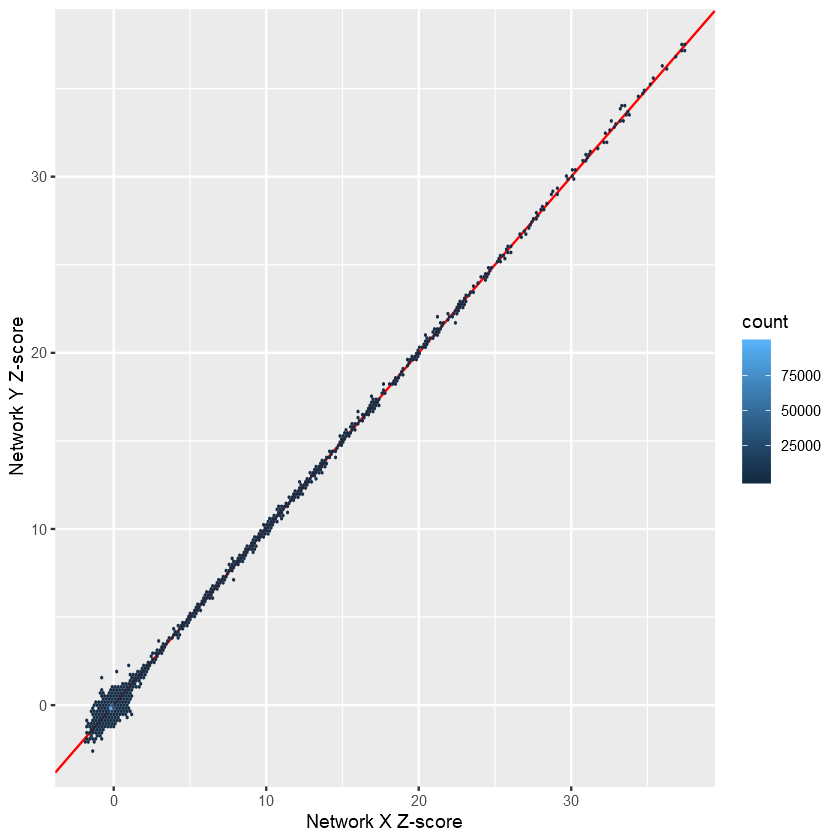

In [52]:
plotZ(pandaResult_Ctrl, pandaResult_ALS,addLine=T)

In [191]:
identical(topNet1@regNet,topNet2@regNet)
identical(topNet1@coopNet,topNet2@coopNet)
identical(topNet1@coregNet,topNet2@coregNet)

[1] FALSE

[1] FALSE

[1] FALSE

In [ ]:
# Which edges are different between ALS and Ctrl

In [192]:
z<-topNet1@regNet==topNet2@regNet
which(z==FALSE,arr.ind = TRUE)
dim(which(z==FALSE,arr.ind = TRUE))

,row,col
AOX1,151,61
AOX1,151,108
GAD2,625,118
ACSS1,48,129
GAD2,625,129
GAD1,624,143
GAD2,625,143
CYP11A1,410,150


[1] 8 2

## Create Cytoscape file

In [195]:
dim(topNet1@regNet)
dim(topNet2@regNet)
dim(regulatoryNetwork)

[1] 1624  173

[1] 1624  173

[1] 1624  173

In [196]:
i=1:8
ALS_cytoscape=setNames(melt(topNet1@regNet[which(z==FALSE,arr.ind = TRUE)[i,1],which(z==FALSE,arr.ind = TRUE)[i,2]]), 
         c('rows', 'vars', 'values'))
ALS_cytoscape$type='ALS'
ALS_cytoscape=ALS_cytoscape %>% filter(!values==0)
head(ALS_cytoscape)
dim(ALS_cytoscape)

ctrl_cytoscape=setNames(melt(topNet2@regNet[which(z==FALSE,arr.ind = TRUE)[i,1],which(z==FALSE,arr.ind = TRUE)[i,2]]), 
         c('rows', 'vars', 'values'))
ctrl_cytoscape$type='ctrl'
ctrl_cytoscape=ctrl_cytoscape %>% filter(!values==0)
head(ctrl_cytoscape)
dim(ctrl_cytoscape)

both_cytoscape=setNames(melt(regulatoryNetwork[which(z==FALSE,arr.ind = TRUE)[i,1],which(z==FALSE,arr.ind = TRUE)[i,2]]), 
         c('rows', 'vars', 'values'))
both_cytoscape$type='both'
both_cytoscape=both_cytoscape %>% filter(!values==0)
head(both_cytoscape)
dim(both_cytoscape)

rows,vars,values,type
AOX1,C00255,1,ALS
AOX1,C00255,1,ALS
AOX1,C00864,1,ALS
AOX1,C00864,1,ALS
GAD1,C01181,1,ALS
AOX1,C02170,1,ALS


[1] 21  4

rows,vars,values,type
GAD2,C01181,1,ctrl
GAD2,C01181,1,ctrl
GAD1,C01181,1,ctrl
GAD2,C01181,1,ctrl
AOX1,C02170,1,ctrl
AOX1,C02170,1,ctrl


[1] 21  4

rows,vars,values,type
AOX1,C02170,1,both
AOX1,C02170,1,both
AOX1,C02170,1,both
AOX1,C02170,1,both


[1] 4 4

ALL_cytoscape=rbind(ALS_cytoscape,ctrl_cytoscape,both_cytoscape)
write.csv(ALL_cytoscape,"ALL_cytoscape_v2.csv")

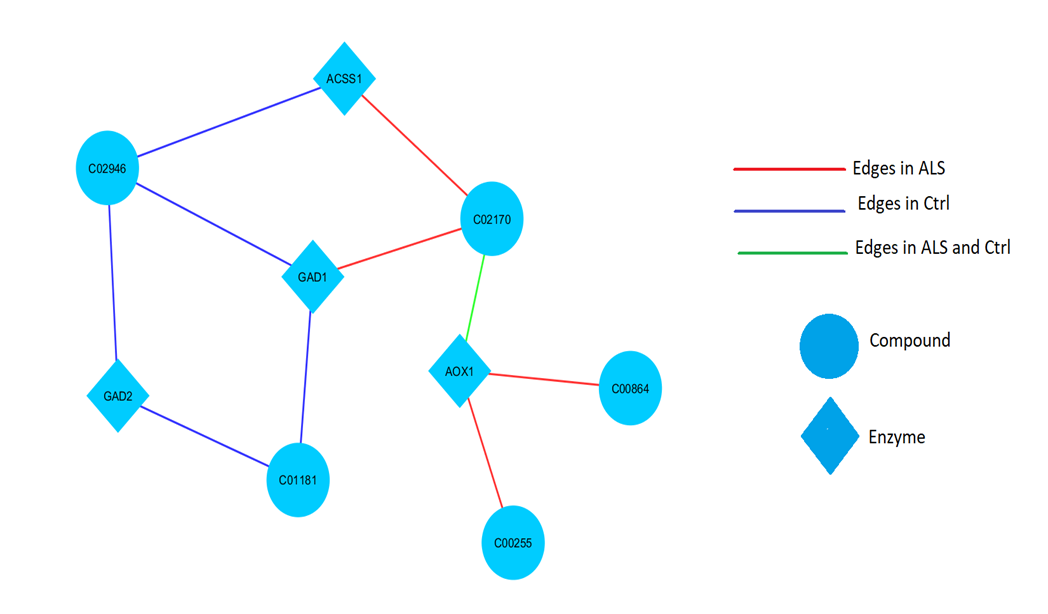


In [87]:
# Generate regulatoryNetwork

In [194]:
randomize='None'
  iter=NA
  alpha=0.1
  hamming=0.001
  progress=FALSE
  cor.method="pearson"
  scale.by.present=F
  motif=motif
  expr=expression_new_ALS
  class(expr)
  dim(expr)
  length(unique(rownames(expr)))
  df=expr
  df=df[!duplicated(rownames(df)),]
  dim(df)
  class(df)
  expr=df
  class(expr)
  ppi=ppi
  dim(motif)
  length(unique(motif$converted_alias))
  length(unique(motif$compound_id))
  length(unique(intersect(rownames(expr),motif$compound_id)))
  
  dim(ppi)
  length(unique(ppi$SOURCE))
  length(unique(ppi$TARGET))
  length(intersect(unique(ppi$SOURCE),unique(ppi$TARGET)))
  length(intersect(intersect(unique(ppi$SOURCE),unique(ppi$TARGET)),unique(motif$converted_alias)))
  
  dim(expr)
  remove.missing.motif=T
  remove.missing.genes=T
  remove.missing.ppi=T
  
  #randomize <- match.arg(randomize)  
  if(progress)
    print('Initializing and validating')
  
  if(class(expr)=="ExpressionSet")
    expr <- assayData(expr)[["exprs"]]
  
  if (is.null(expr)){
    # Use only the motif data here for the gene list
    num.conditions <- 0
    if (randomize!="None"){
      warning("Randomization ignored because gene expression is not used.")
      randomize <- "None"
    }
  } else {
    if(remove.missing.genes){
      # remove genes from expression data that are not in the motif data
      n <- nrow(expr)
      expr <- expr[which(rownames(expr)%in%motif[,2]),]
      message(sprintf("%s genes removed that were not present in motif", n-nrow(expr)))
      dim(expr)
    }
    if(remove.missing.motif){
      # remove genes from motif data that are not in the expression data
      n <- nrow(motif)
      motif <- motif[which(motif[,2]%in%rownames(expr)),]
      message(sprintf("%s motif edges removed that targeted genes missing in expression data", n-nrow(motif)))
    }
    # Use the motif data AND the expr data (if provided) for the gene list
    # Keep everything sorted alphabetically
    expr <- expr[order(rownames(expr)),]
    num.conditions <- ncol(expr)
    if (randomize=='within.gene'){
      expr <- t(apply(expr, 1, sample))
      if(progress)
        print("Randomizing by reordering each gene's expression")
    } else if (randomize=='by.gene'){
      rownames(expr) <- sample(rownames(expr))
      expr           <- expr[order(rownames(expr)),]
      if(progress)
        print("Randomizing by reordering each gene labels")
    }
  }
  
  # Create vectors for TF names and Gene names from motif dataset
  tf.names   <- sort(unique(motif[,1]))
  gene.names <- sort(unique(rownames(expr)))
  num.TFs    <- length(tf.names)
  num.TFs
  num.genes  <- length(gene.names)
  num.genes
  # Bad data checking
  if (num.genes==0){
    stop("Error validating data.  No matched genes.\n  Please ensure that gene names in expression data match gene names in motif data")
  }
  
  if(num.conditions==0) {
    warning('No expression data given.  PANDA will run based on an identity co-regulation matrix')
    geneCoreg <- diag(num.genes)
  } else if(num.conditions<3) {
    warning('Not enough expression conditions detected to calculate correlation. Co-regulation network will be initialized to an identity matrix.')
    geneCoreg <- diag(num.genes)
  } else {
    
    if(scale.by.present){
      num.positive=(expr>0)%*%t((expr>0))
      geneCoreg <- cor(t(expr), method=cor.method, use="pairwise.complete.obs")*(num.positive/num.conditions)
    } else {
      geneCoreg <- cor(t(expr), method=cor.method, use="pairwise.complete.obs")
    }
    if(progress)
      print('Verified sufficient samples')
  }
  geneCoreg [is.na(geneCoreg )]=0
  if (any(duplicated(motif))) {
    warning("Duplicate edges have been found in the motif data. Weights will be summed.")
    motif <- aggregate(motif[,3], by=list(motif[,1], motif[,2]), FUN=sum)
  }
  
  # Prior Regulatory Network
  Idx1=na.omit(match(motif[,1], tf.names));
  Idx2=na.omit(match(motif[,2], gene.names));
  Idx=(Idx2-1)*num.TFs+Idx1;
  regulatoryNetwork=matrix(data=0, num.TFs, num.genes);
  regulatoryNetwork[Idx]=motif[,3]
  colnames(regulatoryNetwork) <- gene.names
  rownames(regulatoryNetwork) <- tf.names
  dim(regulatoryNetwork) # 1624 x 173
  # PPI data
  # If no ppi data is given, we use the identity matrix
  tfCoopNetwork <- diag(num.TFs)
  # Else we convert our two-column data.frame to a matrix
  if (!is.null(ppi)){
    if(any(duplicated(ppi))){
      warning("Duplicate edges have been found in the PPI data. Weights will be summed.")
      ppi <- aggregate(ppi[,3], by=list(ppi[,1], ppi[,2]), FUN=sum)
    }
    if(remove.missing.ppi){
      # remove edges in the PPI data that target TFs not in the motif
      n <- nrow(ppi)
      ppi <- ppi[which(ppi[,1]%in%tf.names & ppi[,2]%in%tf.names),]
      message(sprintf("%s PPI edges removed that were not present in motif", n-nrow(ppi)))
    }
    Idx1 <- na.omit(match(ppi[,1], tf.names));
    Idx2 <- na.omit(match(ppi[,2], tf.names));
    Idx <- (Idx2-1)*num.TFs+Idx1;
    tfCoopNetwork[Idx] <- ppi[,3];
    Idx <- (Idx1-1)*num.TFs+Idx2;
    tfCoopNetwork[Idx] <- ppi[,3];
  }
  colnames(tfCoopNetwork) <- tf.names
  rownames(tfCoopNetwork) <- tf.names
  
  dim(tfCoopNetwork)

[1] "matrix"

[1] 1044  134

[1] 1044

[1] 1044  134

[1] "matrix"

[1] "matrix"

[1] 25447     3

[1] 2257

[1] 2334

[1] 173

[1] 13455     3

[1] 2836

[1] 2809

[1] 1647

[1] 755

[1] 1044  134

871 genes removed that were not present in motif
22690 motif edges removed that targeted genes missing in expression data


[1] 1624

[1] 173

[1] 1624  173

Warning message in eval(expr, envir, enclos):
"Duplicate edges have been found in the PPI data. Weights will be summed."10939 PPI edges removed that were not present in motif


[1] 1624 1624